<a href="https://colab.research.google.com/github/kenclements/praxis/blob/main/DNN-Basic-TWOS-0-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!nvidia-smi

Tue Feb 21 22:15:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |   1030MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string
import re

#Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


#DNN Modules
import torch
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import losses
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import TextVectorization


#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression


#Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [77]:
df = pd.read_csv('/content/drive/MyDrive/Praxis/data/TWOS/email_ano/combined.csv')
#df = pd.read_csv('/Data/TWOS-dataset/email_ano/combined.csv')
#df = pd.read_csv('/Data/TWOS-dataset/email_ano/IMDB Dataset.csv')
#df = pd.read_csv('/content/drive/MyDrive/Praxis/data/IMDB Dataset.csv')



In [78]:
df.head(1)

,id,label,body_anon,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,758,NORMAL,Hey Yeah I think we could do that. I did a tes...,43.0,48.77,91.85,87.51,25.77,8.6,13.95,...,2.33,0.0,0.0,4.65,2.33,0.0,0.0,4.65,0.0,0.0


In [79]:
#Only when working on another dataset to confirm function or universality
#df.rename(columns={"review": "body_anon", "sentiment": "label"}, inplace=True)

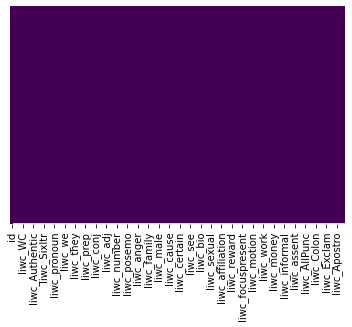

In [80]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
df.dropna(subset=['label'], inplace=True)


In [82]:
def prep(dfx):
    dfx1 = [re.sub(r'[^\w\s]','', x) for x in dfx]
    dfx1 = ''.join(dfx1)
    return(dfx1)

#df['body_anon'] = df['body_anon'].apply(prep)

In [83]:
df.head(1)

,id,label,body_anon,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,758,NORMAL,Hey Yeah I think we could do that. I did a tes...,43.0,48.77,91.85,87.51,25.77,8.6,13.95,...,2.33,0.0,0.0,4.65,2.33,0.0,0.0,4.65,0.0,0.0


In [84]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words);

    return(joined)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
    
df['tokenized'] = df['body_anon']
#.apply(prepare_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [85]:
df.head(1)


,id,label,body_anon,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,...,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP,tokenized
0,758,NORMAL,Hey Yeah I think we could do that. I did a tes...,43.0,48.77,91.85,87.51,25.77,8.6,13.95,...,0.0,0.0,4.65,2.33,0.0,0.0,4.65,0.0,0.0,Hey Yeah I think we could do that. I did a tes...


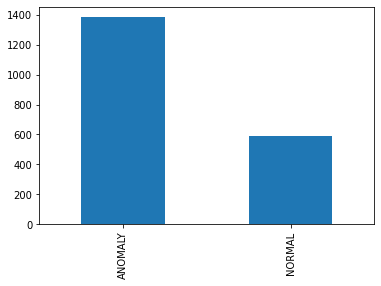

In [86]:
df['label'].value_counts().plot(kind='bar')

In [87]:
df['label'] = df['label'].map({'ANOMALY': 0, 'NORMAL': 1})

In [88]:
train, test = train_test_split(df, test_size=0.3, stratify=df['label'])
train, validation = train_test_split(train, test_size=0.3, stratify=train['label'])

train.shape, validation.shape, test.shape

((967, 97), (415, 97), (593, 97))

In [89]:
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train['body_anon'].values, train['label'].values)).batch(batch_size=32)

validation_dataset = tf.data.Dataset.from_tensor_slices(
    (validation['body_anon'].values, validation['label'].values)).batch(batch_size=32)

In [90]:
vocab_size = 5000       

tfidf_vectorizer = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode='tf_idf'
)

tfidf_vectorizer.adapt(train['body_anon'].values)



In [91]:
model = Sequential()
model.add(tfidf_vectorizer)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (TextV  (None, 2486)             1         
 ectorization)                                                   
                                                                 
 dense_8 (Dense)             (None, 128)               318336    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 326,658
Trainable params: 326,657
Non-trainable params: 1
_________________________________________________________________


In [93]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
history = model.fit(training_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
31/31 [==============================] - 2s 12ms/step - loss: 0.6951 - accuracy: 0.6670 - val_loss: 0.6665 - val_accuracy: 0.6651
Epoch 2/20
31/31 [==============================] - 0s 6ms/step - loss: 0.6243 - accuracy: 0.6949 - val_loss: 0.7909 - val_accuracy: 0.5614
Epoch 3/20
31/31 [==============================] - 0s 6ms/step - loss: 0.5260 - accuracy: 0.7053 - val_loss: 1.0417 - val_accuracy: 0.5614
Epoch 4/20
31/31 [==============================] - 0s 7ms/step - loss: 0.4855 - accuracy: 0.7487 - val_loss: 1.5638 - val_accuracy: 0.6313
Epoch 5/20
31/31 [==============================] - 0s 6ms/step - loss: 0.4768 - accuracy: 0.7580 - val_loss: 1.2701 - val_accuracy: 0.6386
Epoch 6/20
31/31 [==============================] - 0s 7ms/step - loss: 0.4559 - accuracy: 0.7735 - val_loss: 1.4019 - val_accuracy: 0.6361
Epoch 7/20
31/31 [==============================] - 0s 6ms/step - loss: 0.3673 - accuracy: 0.8190 - val_loss: 1.4716 - val_accuracy: 0.6554
Epoch 8/20
31/31 [=

In [95]:
predictions = model.predict(test['body_anon']).round()

19/19 [==============================] - 0s 3ms/step


In [96]:
accuracy_score(test['label'].values, predictions)

0.6155143338954469

In [97]:
confusion_matrix(test['label'].values, predictions)

array([[353,  63],
       [165,  12]])